In [160]:
import os
import pandas as pd

from collections import Counter

from tqdm import tqdm_notebook
tqdm_notebook().pandas()
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk import pos_tag

from gensim.models import CoherenceModel

/var/folders/cl/4c7gj8y530b5jcf0qft_58jw0000gn/T/ipykernel_60726/3671620964.py:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  tqdm_notebook().pandas()


0it [00:00, ?it/s]

# Reading data

In [91]:
datapath = ["/Users/manideep/Documents/DirectedStudy/richmondhill/","/Users/manideep/Documents/DirectedStudy/Niagara/"]
text = ['']

for path in datapath:
    for dirname, _ , filenames in os.walk(path):
        #print('Directory: ', dirname)
        #print('Subdir: ', dirname.split('/')[-1])
        # remove the Readme.txt file
        # will not find file in the second iteration so we skip the error
        for filename in filenames:
            fullpathfile = os.path.join(dirname,filename)
            with open(fullpathfile, 'r', encoding="utf8", errors='ignore') as infile:
                intext = ''
                firstline = True
                for line in infile:
                    if firstline:
                        firstline = False
                    else:
                        intext = intext + ' ' + line.replace('\n','')
                if(len(intext)>0):
                    text.append(intext)

In [108]:
text.pop(0)

''

In [109]:
data = pd.DataFrame(list(text),columns =[ 'texts'])

data.shape

(3105, 1)

In [110]:
data

,texts
0,...
1,...
2,...
3,...
4,...
...,...
3100,Reconstruction/Construction of sanitary sewer...
3101,Public Art - Niagara Falls Exchange...
3102,Skip to NavigationSkip to main contentSkip to...
3103,4868 Crysler AvFull Map of 4868 Crysler AvSit...


#### Tokenization

In [111]:
data['sentences'] = data.texts.progress_map(sent_tokenize)

  0%|          | 0/3105 [00:00<?, ?it/s]

In [112]:
data['tokens_sentences'] = data['sentences'].progress_map(lambda sentences: [word_tokenize(sentence) for sentence in sentences])


data.head()

  0%|          | 0/3105 [00:00<?, ?it/s]

,texts,sentences,tokens_sentences
0,...,[ ...,"[[News, -, City, of, Richmond, Hill, Skip, to,..."
1,...,[ ...,"[[Parks, and, Facilities, -, City, of, Richmon..."
2,...,[ ...,"[[Reports, ,, Publications, and, Plans, -, Cit..."
3,...,[ ...,"[[Tree, Diseases, and, Pests, -, City, of, Ric..."
4,...,[ ...,"[[Parks, and, Facilities, -, City, of, Richmon..."


In [113]:
def numberOfWords(document):
    count=0
    for sentence in document:
        for word in sentence:
            count = count + 1
            
    return count


data['number_of_words'] =  data['tokens_sentences'].progress_map(numberOfWords)

  0%|          | 0/3105 [00:00<?, ?it/s]

In [114]:
data

,texts,sentences,tokens_sentences,number_of_words
0,...,[ ...,"[[News, -, City, of, Richmond, Hill, Skip, to,...",1562
1,...,[ ...,"[[Parks, and, Facilities, -, City, of, Richmon...",724
2,...,[ ...,"[[Reports, ,, Publications, and, Plans, -, Cit...",657
3,...,[ ...,"[[Tree, Diseases, and, Pests, -, City, of, Ric...",1946
4,...,[ ...,"[[Parks, and, Facilities, -, City, of, Richmon...",573
...,...,...,...,...
3100,Reconstruction/Construction of sanitary sewer...,[ Reconstruction/Construction of sanitary sewe...,"[[Reconstruction/Construction, of, sanitary, s...",109
3101,Public Art - Niagara Falls Exchange...,[ Public Art - Niagara Falls Exchang...,"[[Public, Art, -, Niagara, Falls, Exchange, |,...",1436
3102,Skip to NavigationSkip to main contentSkip to...,[ Skip to NavigationSkip to main contentSkip t...,"[[Skip, to, NavigationSkip, to, main, contentS...",761
3103,4868 Crysler AvFull Map of 4868 Crysler AvSit...,[ 4868 Crysler AvFull Map of 4868 Crysler AvSi...,"[[4868, Crysler, AvFull, Map, of, 4868, Crysle...",43


#### Lemmatizing with POS tagging

In [121]:
data['POS_tokens'] = data['tokens_sentences'].progress_map(lambda tokens_sentences: [pos_tag(tokens) for tokens in tokens_sentences])


data.head()

  0%|          | 0/3105 [00:00<?, ?it/s]

,texts,sentences,tokens_sentences,number_of_words,POS_tokens
0,...,[ ...,"[[News, -, City, of, Richmond, Hill, Skip, to,...",1562,"[[(News, NNP), (-, :), (City, NNP), (of, IN), ..."
1,...,[ ...,"[[Parks, and, Facilities, -, City, of, Richmon...",724,"[[(Parks, NNS), (and, CC), (Facilities, NNP), ..."
2,...,[ ...,"[[Reports, ,, Publications, and, Plans, -, Cit...",657,"[[(Reports, NNS), (,, ,), (Publications, NNS),..."
3,...,[ ...,"[[Tree, Diseases, and, Pests, -, City, of, Ric...",1946,"[[(Tree, NNP), (Diseases, NNP), (and, CC), (Pe..."
4,...,[ ...,"[[Parks, and, Facilities, -, City, of, Richmon...",573,"[[(Parks, NNS), (and, CC), (Facilities, NNP), ..."


In [122]:
# Inspired from https://stackoverflow.com/a/15590384
from nltk.corpus import wordnet

def get_wordnet_pos(treebank_tag):

    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return ''

from nltk.stem.wordnet import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [123]:
# Lemmatizing each word with its POS tag, in each sentence
data['tokens_sentences_lemmatized'] = data['POS_tokens'].progress_map(
    lambda list_tokens_POS: [
        [
            lemmatizer.lemmatize(el[0], get_wordnet_pos(el[1])) 
            if get_wordnet_pos(el[1]) != '' else el[0] for el in tokens_POS
        ] 
        for tokens_POS in list_tokens_POS
    ]
)

  0%|          | 0/3105 [00:00<?, ?it/s]

In [124]:
data.head()

,texts,sentences,tokens_sentences,number_of_words,POS_tokens,tokens_sentences_lemmatized
0,...,[ ...,"[[News, -, City, of, Richmond, Hill, Skip, to,...",1562,"[[(News, NNP), (-, :), (City, NNP), (of, IN), ...","[[News, -, City, of, Richmond, Hill, Skip, to,..."
1,...,[ ...,"[[Parks, and, Facilities, -, City, of, Richmon...",724,"[[(Parks, NNS), (and, CC), (Facilities, NNP), ...","[[Parks, and, Facilities, -, City, of, Richmon..."
2,...,[ ...,"[[Reports, ,, Publications, and, Plans, -, Cit...",657,"[[(Reports, NNS), (,, ,), (Publications, NNS),...","[[Reports, ,, Publications, and, Plans, -, Cit..."
3,...,[ ...,"[[Tree, Diseases, and, Pests, -, City, of, Ric...",1946,"[[(Tree, NNP), (Diseases, NNP), (and, CC), (Pe...","[[Tree, Diseases, and, Pests, -, City, of, Ric..."
4,...,[ ...,"[[Parks, and, Facilities, -, City, of, Richmon...",573,"[[(Parks, NNS), (and, CC), (Facilities, NNP), ...","[[Parks, and, Facilities, -, City, of, Richmon..."


#### Regrouping tokens and removing stop words

In [125]:
from nltk.corpus import stopwords
stopwords_verbs = ['say', 'get', 'go', 'know', 'may', 'need', 'like', 'make', 'see', 'want', 'come', 'take', 'use', 'would', 'can']
stopwords_other = ['one', 'mr', 'bbc', 'image', 'getty', 'de', 'en', 'caption', 'also', 'copyright', 'something']
my_stopwords = stopwords.words('English') + stopwords_verbs + stopwords_other

In [126]:
from itertools import chain # to flatten list of sentences of tokens into list of tokens

In [127]:
data['tokens'] = data['tokens_sentences_lemmatized'].map(lambda sentences: list(chain.from_iterable(sentences)))
data['tokens'] = data['tokens'].map(lambda tokens: [token.lower() for token in tokens if token.isalpha() 
                                                    and token.lower() not in my_stopwords and len(token)>1])

In [128]:
data.head()

,texts,sentences,tokens_sentences,number_of_words,POS_tokens,tokens_sentences_lemmatized,tokens
0,...,[ ...,"[[News, -, City, of, Richmond, Hill, Skip, to,...",1562,"[[(News, NNP), (-, :), (City, NNP), (of, IN), ...","[[News, -, City, of, Richmond, Hill, Skip, to,...","[news, city, richmond, hill, skip, content, me..."
1,...,[ ...,"[[Parks, and, Facilities, -, City, of, Richmon...",724,"[[(Parks, NNS), (and, CC), (Facilities, NNP), ...","[[Parks, and, Facilities, -, City, of, Richmon...","[parks, facilities, city, richmond, hill, skip..."
2,...,[ ...,"[[Reports, ,, Publications, and, Plans, -, Cit...",657,"[[(Reports, NNS), (,, ,), (Publications, NNS),...","[[Reports, ,, Publications, and, Plans, -, Cit...","[reports, publications, plans, city, richmond,..."
3,...,[ ...,"[[Tree, Diseases, and, Pests, -, City, of, Ric...",1946,"[[(Tree, NNP), (Diseases, NNP), (and, CC), (Pe...","[[Tree, Diseases, and, Pests, -, City, of, Ric...","[tree, diseases, pests, city, richmond, hill, ..."
4,...,[ ...,"[[Parks, and, Facilities, -, City, of, Richmon...",573,"[[(Parks, NNS), (and, CC), (Facilities, NNP), ...","[[Parks, and, Facilities, -, City, of, Richmon...","[parks, facilities, city, richmond, hill, skip..."


# LDA

## Data preparation

#### Prepare bi-grams and tri-grams

In [129]:
from gensim.models import Phrases

In [130]:
tokens = data['tokens'].tolist()
bigram_model = Phrases(tokens)
trigram_model = Phrases(bigram_model[tokens], min_count=1)
tokens = list(trigram_model[bigram_model[tokens]])

#### Prepare objects for LDA gensim implementation

In [131]:
from gensim import corpora

In [132]:
dictionary_LDA = corpora.Dictionary(tokens)
dictionary_LDA.filter_extremes(no_below=3)
corpus = [dictionary_LDA.doc2bow(tok) for tok in tokens]

#### Find the optimal number of topics for LDA

In [193]:
from gensim.models import CoherenceModel

#https://github.com/MimiCheng/LDA-topic-modeling-gensim/blob/master/LDA-TopicModeling%20.ipynb

def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """

    coherence_values = []
    model_list = []
    perplexity_list = []
    for num_topics in range(start, limit, step):
        model= models.LdaModel(corpus=corpus, num_topics=num_topics,  
                                           id2word=dictionary_LDA,
                                           chunksize=100,
                                           random_state=80,
                                           passes=10,
                                           alpha='auto')
        
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, corpus=corpus, dictionary=dictionary, coherence='u_mass')
        coherence_values.append(coherencemodel.get_coherence())
        perplexity_list.append(model.log_perplexity(corpus))

    return model_list, coherence_values, perplexity_list

In [194]:


start=2
limit=30
step=3
corpus = corpus
%time model_list, coherence_values, perplexity_list = compute_coherence_values(dictionary=dictionary_LDA, corpus=corpus,texts=text, start=start, limit=limit, step=step)


CPU times: user 6min 30s, sys: 15min 43s, total: 22min 13s
Wall time: 3min 27s


Plotting graph for coherence score and coherence scores


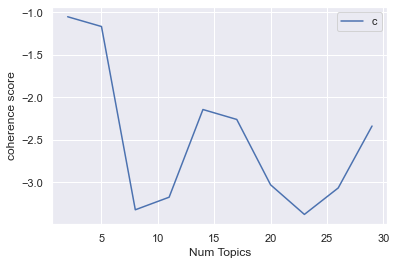

In [195]:
# Print the coherence scores
print ('Plotting graph for coherence score and coherence scores')
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

Plotting graph perplexity values


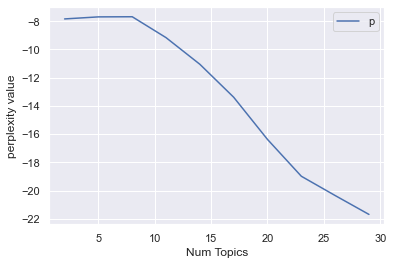

In [197]:
# Print the perplexity_list scores
print ('Plotting graph perplexity values')
x = range(start, limit, step)
plt.plot(x, perplexity_list)
plt.xlabel("Num Topics")
plt.ylabel("perplexity value")
plt.legend(("perplexity"), loc='best')
plt.show()

In [198]:
for m, cv, perplexity in zip(x, coherence_values, perplexity_list):
    round_umass = round(cv, 4)
    print("Num Topics =", m, " has Coherence Value of", round_umass,'and perplexity value is ',perplexity)

Num Topics = 2  has Coherence Value of -1.0524 and perplexity value is  -7.838399464110874
Num Topics = 5  has Coherence Value of -1.1673 and perplexity value is  -7.693220209518864
Num Topics = 8  has Coherence Value of -3.3227 and perplexity value is  -7.683596991677054
Num Topics = 11  has Coherence Value of -3.1748 and perplexity value is  -9.164119288841636
Num Topics = 14  has Coherence Value of -2.1435 and perplexity value is  -11.052537503536824
Num Topics = 17  has Coherence Value of -2.2603 and perplexity value is  -13.388050968725768
Num Topics = 20  has Coherence Value of -3.0289 and perplexity value is  -16.378039056745145
Num Topics = 23  has Coherence Value of -3.3772 and perplexity value is  -18.986777282972362
Num Topics = 26  has Coherence Value of -3.066 and perplexity value is  -20.353250866509203
Num Topics = 29  has Coherence Value of -2.3377 and perplexity value is  -21.692290135514387


In [177]:
model = model_list[4]
#save model
model.save('lda.model')

num_topics=14

## Quick exploration of LDA results

#### Looking at topics

In [178]:
for i,topic in model.show_topics(formatted=True, num_topics=num_topics, num_words=20):
    print(str(i)+": "+ topic)
    print()

0: 0.023*"exciting" + 0.015*"witness" + 0.013*"category" + 0.013*"class" + 0.011*"working" + 0.008*"content" + 0.008*"festival_event" + 0.007*"job" + 0.007*"disability" + 0.007*"search" + 0.006*"fun" + 0.006*"parent" + 0.006*"volunteer" + 0.006*"email" + 0.005*"planting_stewardship_eventsvolunteering" + 0.005*"centre_performing_artsschool_break" + 0.005*"view" + 0.005*"camps_programssplash_padssports_hall" + 0.005*"profile" + 0.005*"famesummer_campsteen_activitiestennis_pickleballtree"

1: 0.030*"map" + 0.023*"centre_performing_artsschool_break" + 0.022*"camps_programssplash_padssports_hall" + 0.022*"famesummer_campsteen_activitiestennis_pickleballtree" + 0.022*"natural_areasrecreation_programsrichmond" + 0.021*"report_problem_feedback_parks" + 0.021*"address" + 0.021*"parks_facilities" + 0.021*"planting_stewardship_eventsvolunteering_decrease" + 0.021*"homethings_doparks_trails_facilities" + 0.021*"print_page_share_page" + 0.021*"facebook_linkedin_twitter_email" + 0.021*"text_size_def

## Advanced exploration of LDA results

#### Allocation of topics in all documents

In [179]:
topics = [model[corpus[i]] for i in range(len(data))]

In [180]:
def topics_document_to_dataframe(topics_document, num_topics):
    res = pd.DataFrame(columns=range(num_topics))
    for topic_weight in topics_document:
        res.loc[0, topic_weight[0]] = topic_weight[1]
    return res

In [181]:
# Like TF-IDF, create a matrix of topic weighting, with documents as rows and topics as columns
document_topic = \
pd.concat([topics_document_to_dataframe(topics_document, num_topics=num_topics) for topics_document in topics]) \
  .reset_index(drop=True).fillna(0)

In [182]:
document_topic.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.239226,0.000000,0.0,0.054473,0.703640,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000
1,0.000000,0.343332,0.0,0.000000,0.000000,0.0,0.138466,0.000000,0.0,0.000000,0.307557,0.0,0.194749,0.000000
2,0.000000,0.000000,0.0,0.058674,0.050100,0.0,0.000000,0.878701,0.0,0.000000,0.000000,0.0,0.000000,0.000000
3,0.000000,0.012377,0.0,0.000000,0.345792,0.0,0.000000,0.000000,0.0,0.449137,0.103994,0.0,0.000000,0.071734
4,0.000000,0.754533,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.202634,0.0,0.000000,0.000000


#### Looking at the distribution of topics in all documents

<AxesSubplot:>

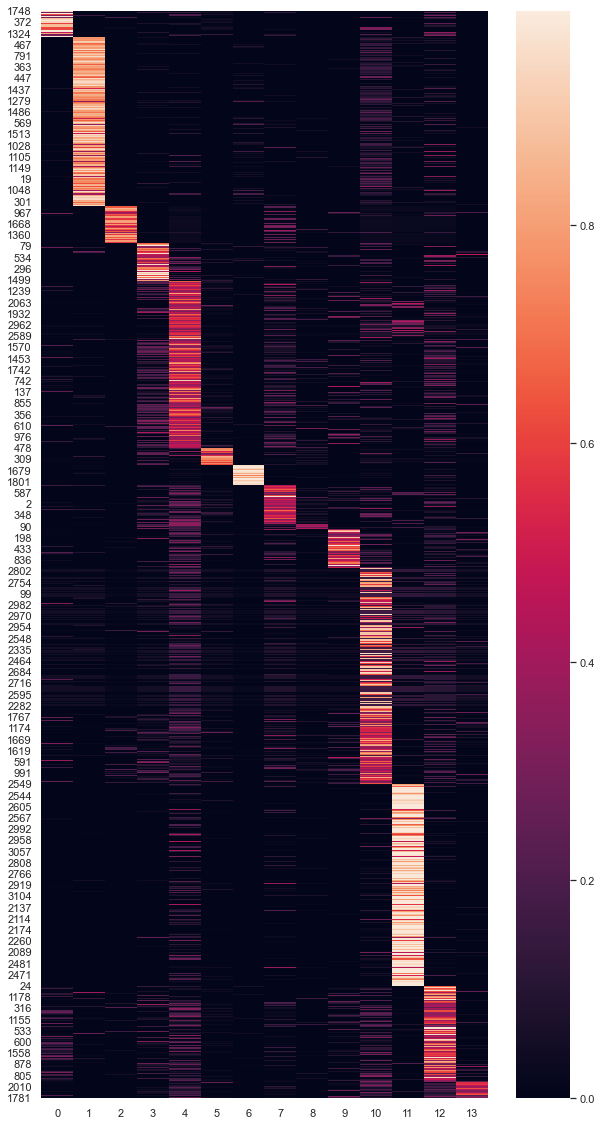

In [183]:
%matplotlib inline
import seaborn as sns; sns.set(rc={'figure.figsize':(10,20)})
sns.heatmap(document_topic.loc[document_topic.idxmax(axis=1).sort_values().index])

<AxesSubplot:>

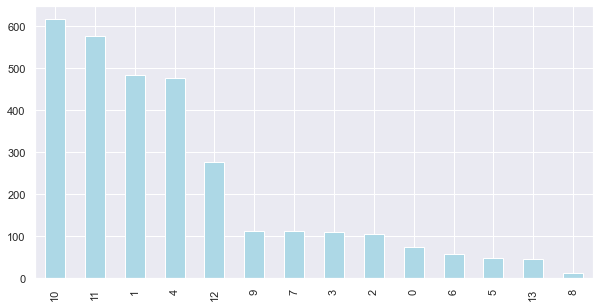

In [184]:
sns.set(rc={'figure.figsize':(10,5)})
document_topic.idxmax(axis=1).value_counts().plot.bar(color='lightblue')

#### Visualizing topics

In [185]:
# https://cran.r-project.org/web/packages/LDAvis/vignettes/details.pdf
# Here a short legend to explain the vis:
# size of bubble: proportional to the proportions of the topics across the N total tokens in the corpus
# red bars: estimated number of times a given term was generated by a given topic
# blue bars: overall frequency of each term in the corpus
# -- Relevance of words is computed with a parameter lambda
# -- Lambda optimal value ~0.6 (https://nlp.stanford.edu/events/illvi2014/papers/sievert-illvi2014.pdf)
%matplotlib inline
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
vis = gensimvis.prepare(topic_model=model, corpus=corpus, dictionary=dictionary_LDA,mds='mmds')
pyLDAvis.enable_notebook()
pyLDAvis.display(vis)

/opt/anaconda3/lib/python3.8/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(
